In [ ]:
# Sumber data : link kaggle https://www.kaggle.com/datasets/mohamedmostafa259/soil-measures/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier

#Evaluasi Data

In [ ]:
df = pd.read_csv("/content/soil_measures.csv")

#Evaluasi Tabel Data Frame
df.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
ph,0
crop,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


##EXPLORATORY DATA ANALYSIS

##Sebaran Data Tanaman (Label)

In [ ]:
df.crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

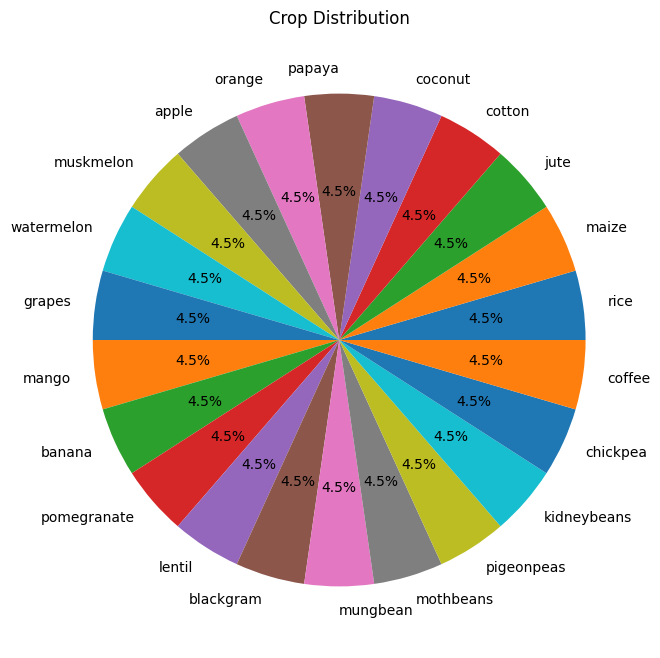

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df.crop.value_counts(), labels=df.crop.value_counts().index, autopct='%1.1f%%')
plt.title('Crop Distribution')
plt.show()

## KORELASI ANTAR FITUR

<Axes: >

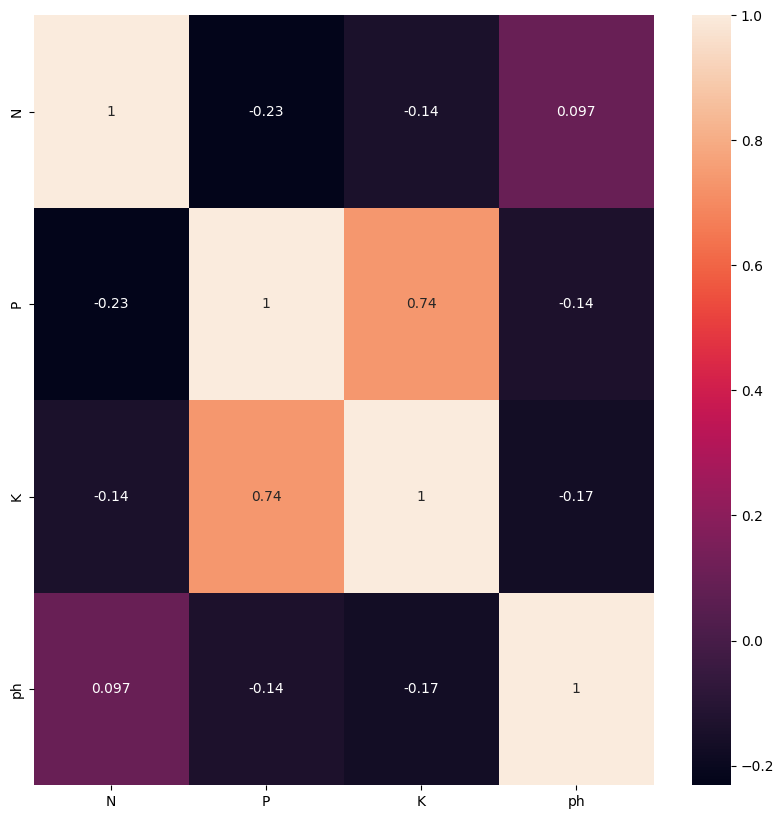

In [ ]:
correlation = df.corr(numeric_only = True)
correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)

#DATA SPLIT DAN PREPROCESSING

In [ ]:
X = df.drop('crop', axis = 1)
y = df['crop']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#RANDOM FOREST CLASSIFIER

In [ ]:
forest = RandomForestClassifier(n_estimators = 500, random_state = 2, max_depth = 15)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, n_estimators=550, random_state=3)

In [ ]:
y_pred = forest.predict(X_test)

forest_score = accuracy_score(y_test, y_pred)
print('Accuracy score is: ', forest_score)

Accuracy score is:  0.8113636363636364


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        23
           1       1.00      1.00      1.00        21
           2       0.84      0.80      0.82        20
           3       1.00      1.00      1.00        26
           4       0.82      0.85      0.84        27
           5       0.89      0.94      0.91        17
           6       0.89      1.00      0.94        17
           7       0.56      0.64      0.60        14
           8       0.56      0.61      0.58        23
           9       0.78      0.90      0.84        20
          10       0.44      0.73      0.55        11
          11       1.00      0.95      0.98        21
          12       0.82      0.74      0.78        19
          13       0.95      0.79      0.86        24
          14       0.79      1.00      0.88        19
          15       0.67      0.59      0.62        17
          16       1.00      1.00      1.00        14
          17       1.00    

In [ ]:
IDX = 400

print(X_test.iloc[IDX])
print(le.inverse_transform([y_test[IDX]]))
print(le.inverse_transform([y_pred[IDX]]))

N     112.000000
P      39.000000
K      29.000000
ph      6.726529
Name: 2168, dtype: float64
['coffee']
['coffee']


##XGB Classifier

In [ ]:
xgbc = XGBClassifier(n_estimators=200, learning_rate=0.01, objective='multiple:logistic')

xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgbc_pred = xgbc.predict(X_test)

xgbc_score = accuracy_score(y_test, xgbc_pred)
print('Accuracy score is: ', xgbc_score)

Accuracy score is:  0.8113636363636364


print(classification_report(y_test, xgbc_pred))

In [ ]:
IDX = 45

print(X_test.iloc[IDX])
print(le.inverse_transform([y_test[IDX]]))
print(le.inverse_transform([y_pred[IDX]]))

N     61.000000
P     59.000000
K     17.000000
ph     6.474443
Name: 184, dtype: float64
['maize']
['maize']


#TES INPUT DENGAN DATA USER

In [ ]:
N = int(input("Masukkan nilai N: "))
P = int(input("Masukkan nilai P: "))
K = int(input("Masukkan nilai K: "))
ph = float(input("Masukkan nilai ph: "))

df_crop = pd.DataFrame([[N, P, K, ph]], columns=['N', 'P', 'K', 'ph'])

df_crop_pred = forest.predict(df_crop)
print(le.inverse_transform(df_crop_pred))

df_crop_pred2 = xgbc.predict(df_crop)
print(le.inverse_transform(df_crop_pred2))


Masukkan nilai N: 30
Masukkan nilai P: 2
Masukkan nilai K: 50
Masukkan nilai ph: 3.5
['pomegranate']
['pomegranate']
